## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Provide the full path to the files or ensure they are in the current working directory
individual_data = pd.read_csv("individual_data.csv")  
health_expenditure = pd.read_csv("health_expenditure.csv", skiprows=4) 

In [3]:
display(individual_data.head())

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [4]:
# Drop unnecessary columns
columns_to_drop = ["ID", "Cost of Treatment (USD)", "Economic Burden (Lost Workdays per Year)"]
individual_data.drop(columns=columns_to_drop, inplace=True)

In [5]:
display(health_expenditure.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,93.889833,88.835308,93.106458,93.222292,90.334281,81.969193,93.053627,NaN,NaN,NaN
2,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,60.058540,61.486458,66.909218,71.334305,74.234108,80.288055,81.319763,NaN,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,71.938048,62.715816,60.835189,59.561036,61.997588,64.798255,73.120225,NaN,NaN,NaN
4,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,107.643562,94.106155,112.851471,83.899200,64.657791,55.051022,64.163422,NaN,NaN,NaN


In [6]:
# Drop unnecessary columns
health_expenditure = health_expenditure[["Country Name", "2021"]].copy()
# Rename columns for clarity
health_expenditure.columns = ["Country", "Health Expenditure"]

In [7]:
display(health_expenditure.head())

,Country,Health Expenditure
0,Aruba,NaN
1,Africa Eastern and Southern,93.053627
2,Afghanistan,81.319763
3,Africa Western and Central,73.120225
4,Angola,64.163422


**Join two Dataset**

In [8]:
# Merge the two datasets on the "Country" column
merged_data = pd.merge(individual_data, health_expenditure, left_on="Country", right_on="Country", how="left")
# Check for missing values in merged data
missing_values = merged_data.isnull().sum()
print("Missing values in merged data:\n", missing_values)

Missing values in merged data:
 Country                              0
Age                                  0
Gender                               0
Tobacco Use                          0
Alcohol Consumption                  0
HPV Infection                        0
Betel Quid Use                       0
Chronic Sun Exposure                 0
Poor Oral Hygiene                    0
Diet (Fruits & Vegetables Intake)    0
Family History of Cancer             0
Compromised Immune System            0
Oral Lesions                         0
Unexplained Bleeding                 0
Difficulty Swallowing                0
White or Red Patches in Mouth        0
Tumor Size (cm)                      0
Cancer Stage                         0
Treatment Type                       0
Survival Rate (5-Year, %)            0
Early Diagnosis                      0
Oral Cancer (Diagnosis)              0
Health Expenditure                   0
dtype: int64


In [9]:
display(merged_data.head())

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Early Diagnosis,Oral Cancer (Diagnosis),Health Expenditure
0,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,...,No,No,No,0.000000,0,No Treatment,100.000000,No,No,3350.000000
1,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,...,Yes,No,No,1.782186,1,No Treatment,83.340103,No,Yes,4347.000000
2,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,...,No,No,Yes,3.523895,2,Surgery,63.222871,Yes,Yes,5738.484863
3,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,...,No,No,No,0.000000,0,No Treatment,100.000000,Yes,No,166.000000
4,South Africa,68,Male,No,No,No,No,No,Yes,High,...,No,No,No,2.834789,3,No Treatment,44.293199,No,Yes,583.671082


## Visualization and Hypothesis Testing

**Early Diagnoses vs Health Expenditure**

In [10]:
# 1. Convert 'Early Diagnosis' to numeric
merged_data['Early Diagnosis Numeric'] = merged_data['Early Diagnosis'].map({'Yes': 1, 'No': 0})

# 2. Group by country and calculate the mean of 'Early Diagnosis Numeric' and 'Health Expenditure'
country_grouped = merged_data.groupby('Country').agg({
    'Early Diagnosis Numeric': 'mean',
    'Health Expenditure': 'mean' 
}).reset_index()

# 3. Use trashold value to split the data into two groups
threshold = country_grouped['Health Expenditure'].median()
high = country_grouped[country_grouped['Health Expenditure'] > threshold]
low = country_grouped[country_grouped['Health Expenditure'] <= threshold]

# 4. Apply T test
t_stat, p_val = ttest_ind(high['Early Diagnosis Numeric'], low['Early Diagnosis Numeric'], equal_var=False)

# 5. Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Decide on rejection of null hypothesis
alpha = 0.05
if p_val < alpha:
    print("\nReject the null hypothesis: There is a significant difference in early diagnosis rates between high and low health expenditure countries.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in early diagnosis rates between high and low health expenditure countries.")


T-statistic: 2.589
P-value: 0.021

Reject the null hypothesis: There is a significant difference in early diagnosis rates between high and low health expenditure countries.


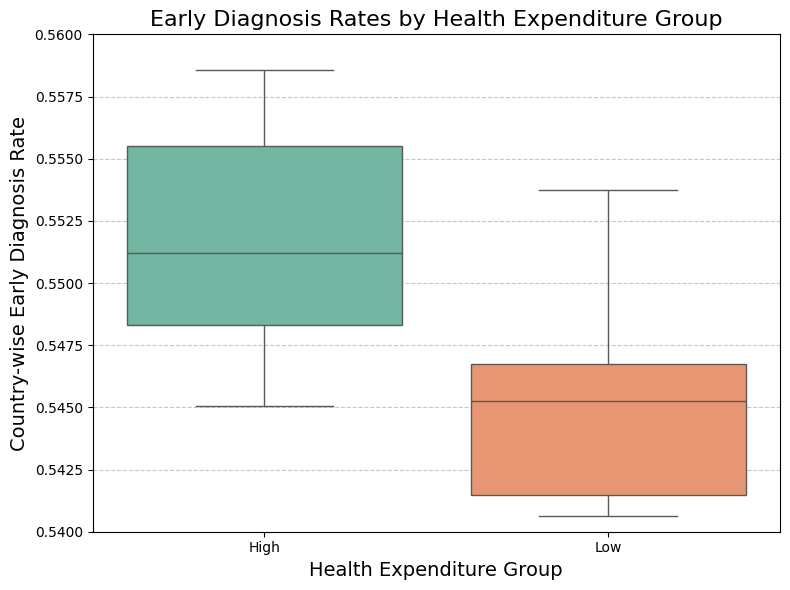

In [11]:
# Classify countries into high and low health expenditure groups based on the median
threshold = country_grouped['Health Expenditure'].median()
country_grouped['Spending Group'] = country_grouped['Health Expenditure'].apply(
    lambda x: 'High' if x > threshold else 'Low'
)

# Boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Spending Group', y='Early Diagnosis Numeric',hue='Spending Group' ,data=country_grouped, palette='Set2', legend=False)

# Title and labels
plt.title('Early Diagnosis Rates by Health Expenditure Group', fontsize=16)
plt.xlabel('Health Expenditure Group', fontsize=14)
plt.ylabel('Country-wise Early Diagnosis Rate', fontsize=14)
plt.ylim(0.54, 0.56)  # Adjusted y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Early Diagnosis vs Survival Rate**

In [12]:
# Consider the only oral cancer patients
cancer_patients = merged_data[merged_data['Oral Cancer (Diagnosis)'] == 'Yes']

# Separate the data into two groups based on early diagnosis
early = cancer_patients[cancer_patients['Early Diagnosis'] == 'Yes']['Survival Rate (5-Year, %)']
late = cancer_patients[cancer_patients['Early Diagnosis'] == 'No']['Survival Rate (5-Year, %)']

# Perform T-test
t_stat, p_val = ttest_ind(early, late, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Decide on rejection of null hypothesis
if p_val < alpha:
    print("\nReject the null hypothesis: There is a significant difference in survival rates between early and late diagnosis groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in survival rates between early and late diagnosis groups.")


T-statistic: 2.966
P-value: 0.003

Reject the null hypothesis: There is a significant difference in survival rates between early and late diagnosis groups.


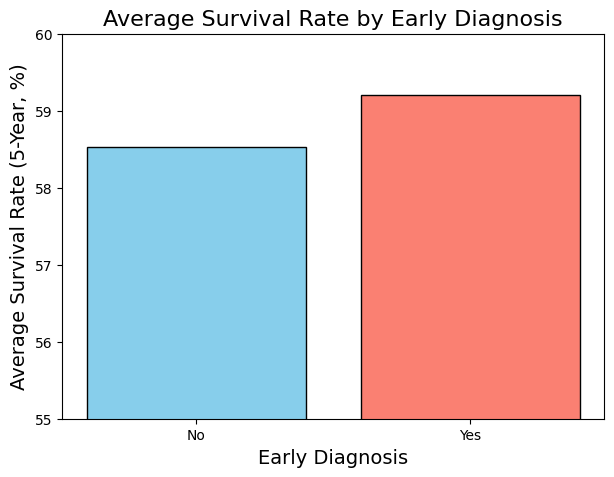

In [13]:
# Group the average survival
group_means = cancer_patients.groupby('Early Diagnosis')['Survival Rate (5-Year, %)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(7, 5))
bars = plt.bar(group_means['Early Diagnosis'], group_means['Survival Rate (5-Year, %)'],
               color=['skyblue', 'salmon'], edgecolor='black')
# Title and labels
plt.title('Average Survival Rate by Early Diagnosis', fontsize=16)
plt.xlabel('Early Diagnosis', fontsize=14)
plt.ylabel('Average Survival Rate (5-Year, %)', fontsize=14)
plt.ylim(55, 60)  # Set y-axis limits for better visibility

plt.show()


**Gender vs Survival Rate**

In [14]:
# Focus only on diagnosed cancer cases
cancer_data = merged_data[merged_data['Oral Cancer (Diagnosis)'] == 'Yes']

male_surv = cancer_data[cancer_data['Gender'] == 'Male']['Survival Rate (5-Year, %)']
female_surv = cancer_data[cancer_data['Gender'] == 'Female']['Survival Rate (5-Year, %)']

t_stat, p_value = ttest_ind(male_surv, female_surv, nan_policy='omit')

print("T-test for Gender (Cancer Patients Only):")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("\nReject the null hypothesis: Significant difference in survival rates between genders.")
else:
    print("\nFail to reject the null hypothesis: No significant difference in survival rates between genders.")

T-test for Gender (Cancer Patients Only):
T-statistic: -0.7452, p-value: 0.4561

Fail to reject the null hypothesis: No significant difference in survival rates between genders.


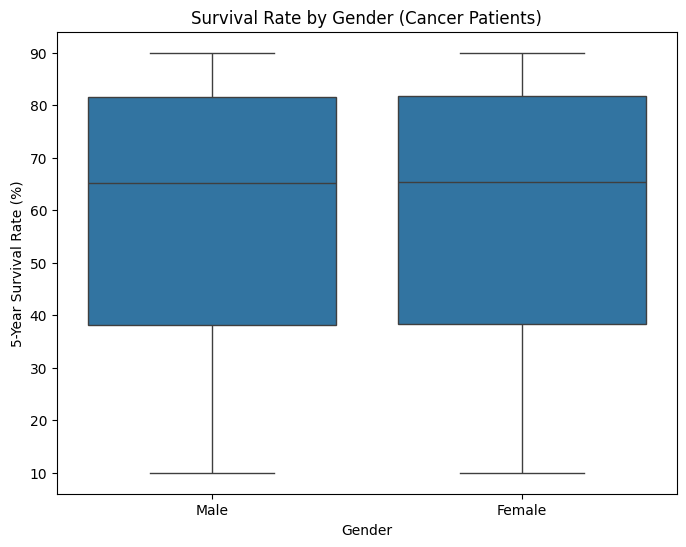

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cancer_data, x='Gender', y='Survival Rate (5-Year, %)')
plt.title('Survival Rate by Gender (Cancer Patients)')
plt.ylabel('5-Year Survival Rate (%)')
plt.xlabel('Gender')
plt.show()

**Treatment Type vs Survival Rate**

In [16]:
treatment_groups = [group['Survival Rate (5-Year, %)'].dropna()
                    for _, group in cancer_data.groupby('Treatment Type')]

f_stat, p_value = f_oneway(*treatment_groups)

print("\nANOVA for Treatment Type (Cancer Patients Only):")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("\nReject the null hypothesis: Survival rates significantly differ across treatment types.")
else:
    print("\nFail to reject the null hypothesis: No significant difference among treatment types.")


ANOVA for Treatment Type (Cancer Patients Only):
F-statistic: 0.4491, p-value: 0.7731

Fail to reject the null hypothesis: No significant difference among treatment types.


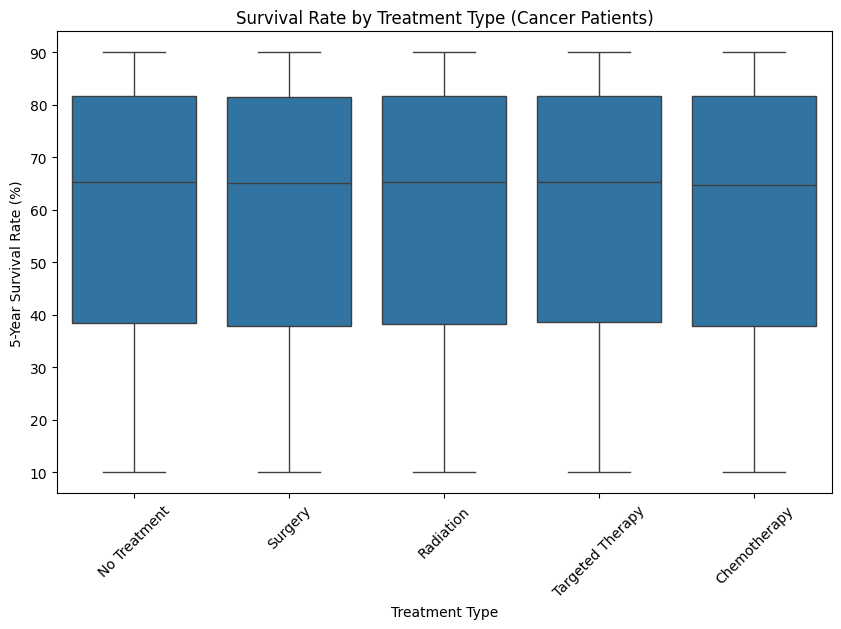

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cancer_data, x='Treatment Type', y='Survival Rate (5-Year, %)')
plt.title('Survival Rate by Treatment Type (Cancer Patients)')
plt.ylabel('5-Year Survival Rate (%)')
plt.xlabel('Treatment Type')
plt.xticks(rotation=45)
plt.show()


**Cancer Stage vs Survival Rate**

In [18]:
stage_groups = [group['Survival Rate (5-Year, %)'].dropna()
                for _, group in cancer_data.groupby('Cancer Stage')]

f_stat, p_value = f_oneway(*stage_groups)

print("\nANOVA for Cancer Stage (Cancer Patients Only):")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("\nReject the null hypothesis: Survival rates differ significantly between cancer stages.")
else:
    print("\nFail to reject the null hypothesis: No significant difference in survival rate among cancer stages.")



ANOVA for Cancer Stage (Cancer Patients Only):
F-statistic: 354344.6336, p-value: 0.0000

Reject the null hypothesis: Survival rates differ significantly between cancer stages.


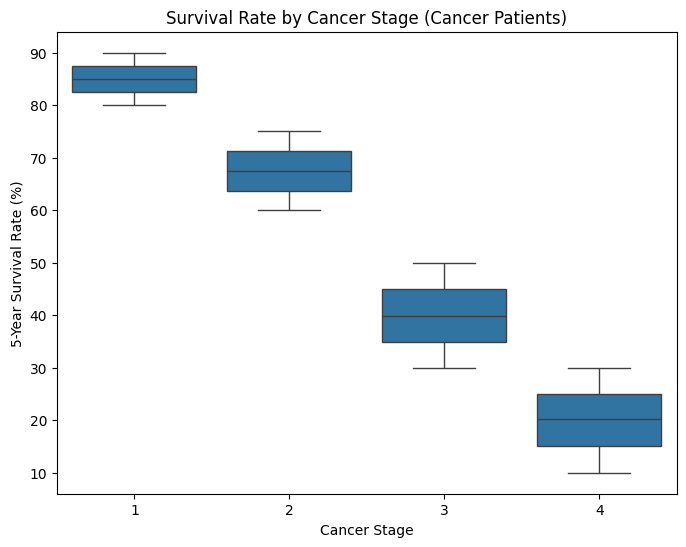

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cancer_data, x='Cancer Stage', y='Survival Rate (5-Year, %)')
plt.title('Survival Rate by Cancer Stage (Cancer Patients)')
plt.ylabel('5-Year Survival Rate (%)')
plt.xlabel('Cancer Stage')
plt.show()


**Numerical Variables vs Survival Rate**

In [20]:
from scipy.stats import pearsonr

for var in ['Age', 'Tumor Size (cm)', 'Health Expenditure']:
    corr, p_value = pearsonr(cancer_data[var], cancer_data['Survival Rate (5-Year, %)'])
    print(f"\nPearson correlation between {var} and Survival Rate (Cancer Patients Only):")
    print(f"Correlation: {corr:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"\nReject the null hypothesis: Significant correlation found between {var} and survival rate.")
    else:
        print(f"\nFail to reject the null hypothesis: No significant correlation found between {var} and survival rate.")


Pearson correlation between Age and Survival Rate (Cancer Patients Only):
Correlation: -0.0015, p-value: 0.7637

Fail to reject the null hypothesis: No significant correlation found between Age and survival rate.

Pearson correlation between Tumor Size (cm) and Survival Rate (Cancer Patients Only):
Correlation: 0.0036, p-value: 0.4626

Fail to reject the null hypothesis: No significant correlation found between Tumor Size (cm) and survival rate.

Pearson correlation between Health Expenditure and Survival Rate (Cancer Patients Only):
Correlation: 0.0055, p-value: 0.2576

Fail to reject the null hypothesis: No significant correlation found between Health Expenditure and survival rate.


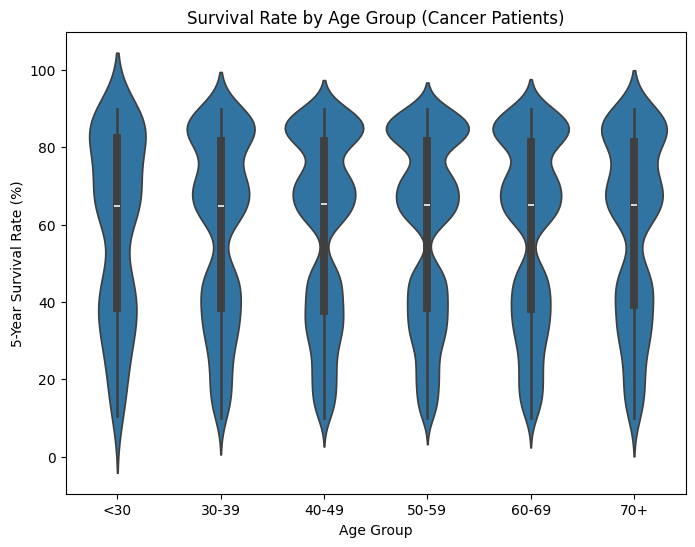

In [21]:
cancer_data['Age Group'] = pd.cut(cancer_data['Age'], bins=[0, 30, 40, 50, 60, 70, 100], 
                                  labels=['<30', '30-39', '40-49', '50-59', '60-69', '70+'])

plt.figure(figsize=(8, 6))
sns.violinplot(data=cancer_data, x='Age Group', y='Survival Rate (5-Year, %)')
plt.title('Survival Rate by Age Group (Cancer Patients)')
plt.xlabel('Age Group')
plt.ylabel('5-Year Survival Rate (%)')
plt.show()

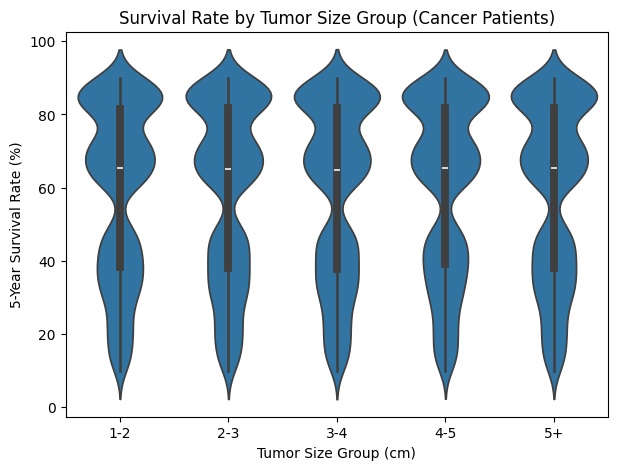

In [22]:
cancer_data['Tumor Size Group'] = pd.cut(
    cancer_data['Tumor Size (cm)'],
    bins=[1, 2, 3, 4, 5, np.inf],
    labels=['1-2', '2-3', '3-4', '4-5', '5+']
)

plt.figure(figsize=(7, 5))
sns.violinplot(data=cancer_data, x='Tumor Size Group', y='Survival Rate (5-Year, %)')
plt.title('Survival Rate by Tumor Size Group (Cancer Patients)')
plt.xlabel('Tumor Size Group (cm)')
plt.ylabel('5-Year Survival Rate (%)')
plt.show()

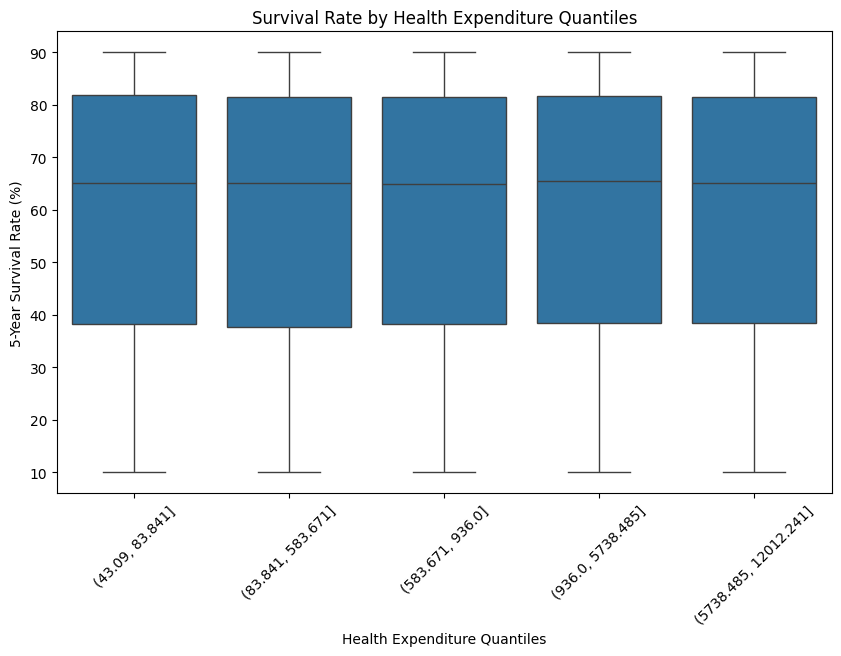

In [23]:
cancer_data['Expenditure Bin'] = pd.qcut(cancer_data['Health Expenditure'], q=5)

plt.figure(figsize=(10, 6))
sns.boxplot(data=cancer_data, x='Expenditure Bin', y='Survival Rate (5-Year, %)')
plt.xticks(rotation=45)
plt.title('Survival Rate by Health Expenditure Quantiles')
plt.xlabel('Health Expenditure Quantiles')
plt.ylabel('5-Year Survival Rate (%)')
plt.show()


**Categorical Variables vs Oral Cancer**

In [24]:
# Columns we want to compare
candidate_columns = ['Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 'Betel Quid Use',
    'Chronic Sun Exposure', 'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
    'Oral Lesions', 'Unexplained Bleeding', 'Difficulty Swallowing',
    'White or Red Patches in Mouth', 'Gender', "Family History of Cancer", "Compromised Immune System",]

for attribute in candidate_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(merged_data[attribute], merged_data['Oral Cancer (Diagnosis)'])

    # Perform Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Attribute: {attribute}")
    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"P-value: {p:.3f}")

    # Decide on rejection of null hypothesis
    if p < alpha:
        print(f"\nReject the null hypothesis:\nThere is a significant association between {attribute} and Oral Cancer.")
    else:
        print(f"\nFail to reject the null hypothesis:\nThere is no significant association between {attribute} and Oral Cancer.")
    print("-" * 40)

Attribute: Tobacco Use
Chi-squared statistic: 0.296
P-value: 0.586

Fail to reject the null hypothesis:
There is no significant association between Tobacco Use and Oral Cancer.
----------------------------------------
Attribute: Alcohol Consumption
Chi-squared statistic: 0.211
P-value: 0.646

Fail to reject the null hypothesis:
There is no significant association between Alcohol Consumption and Oral Cancer.
----------------------------------------
Attribute: HPV Infection
Chi-squared statistic: 0.013
P-value: 0.910

Fail to reject the null hypothesis:
There is no significant association between HPV Infection and Oral Cancer.
----------------------------------------
Attribute: Betel Quid Use
Chi-squared statistic: 0.212
P-value: 0.645

Fail to reject the null hypothesis:
There is no significant association between Betel Quid Use and Oral Cancer.
----------------------------------------
Attribute: Chronic Sun Exposure
Chi-squared statistic: 0.073
P-value: 0.786

Fail to reject the null h

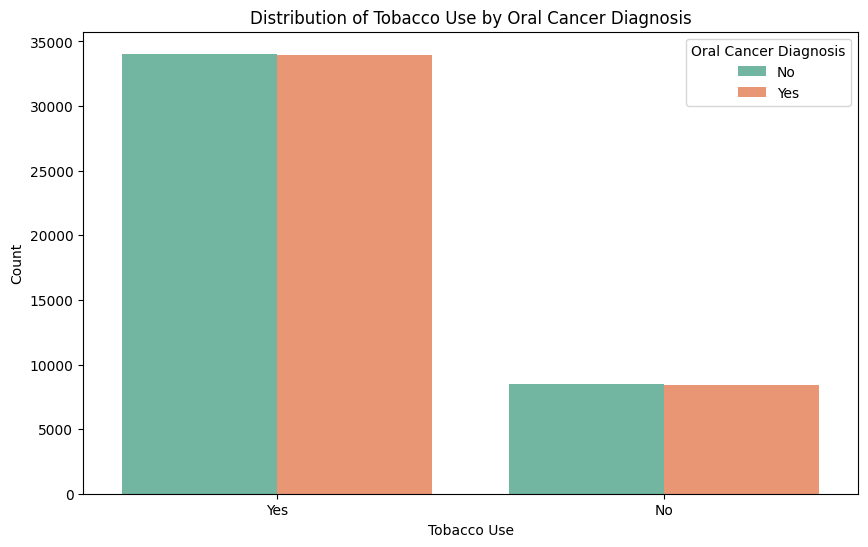

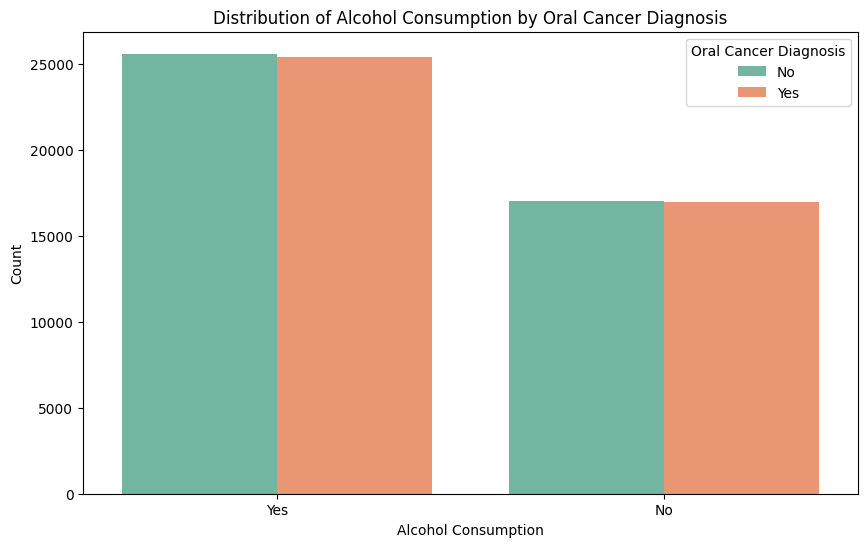

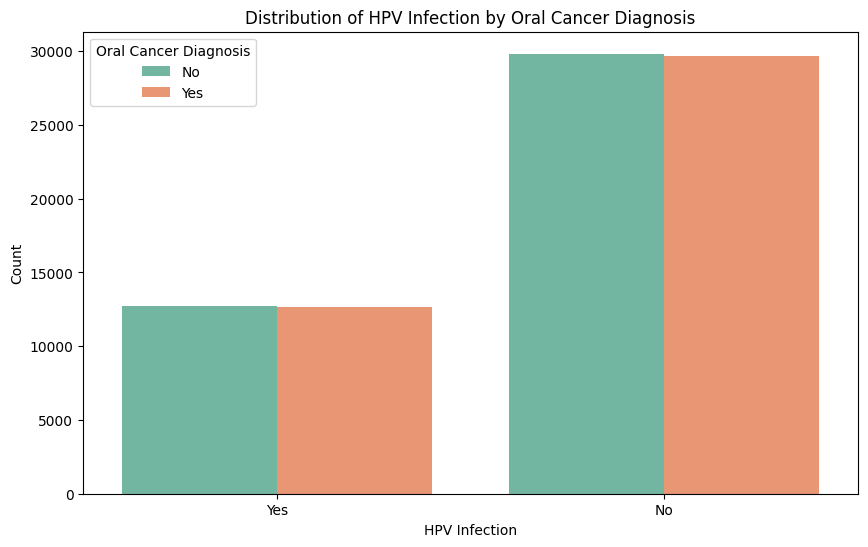

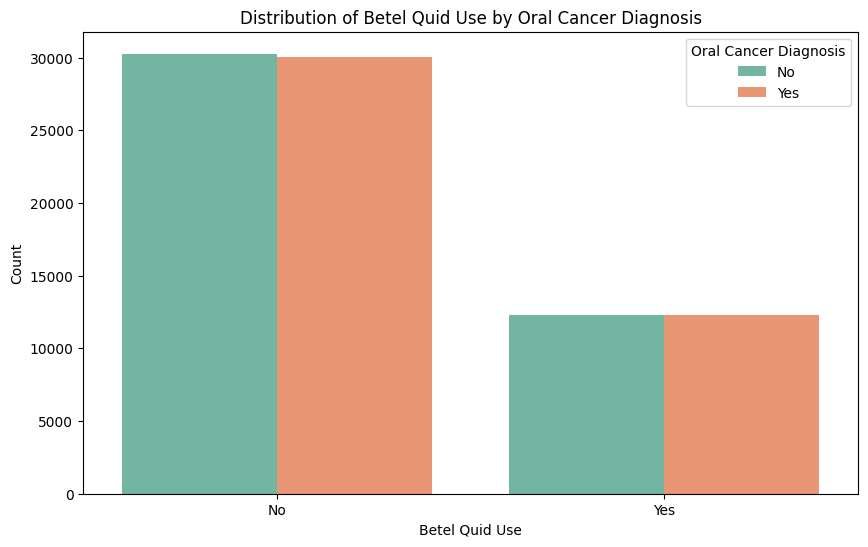

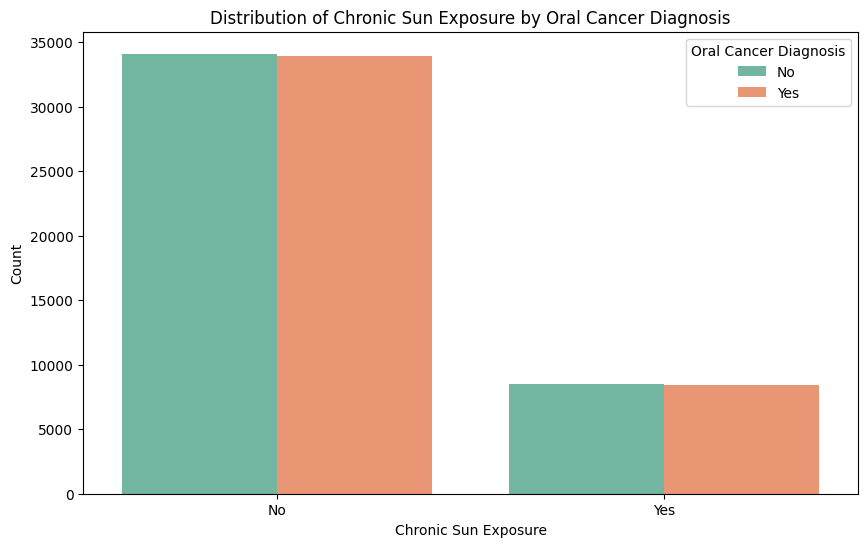

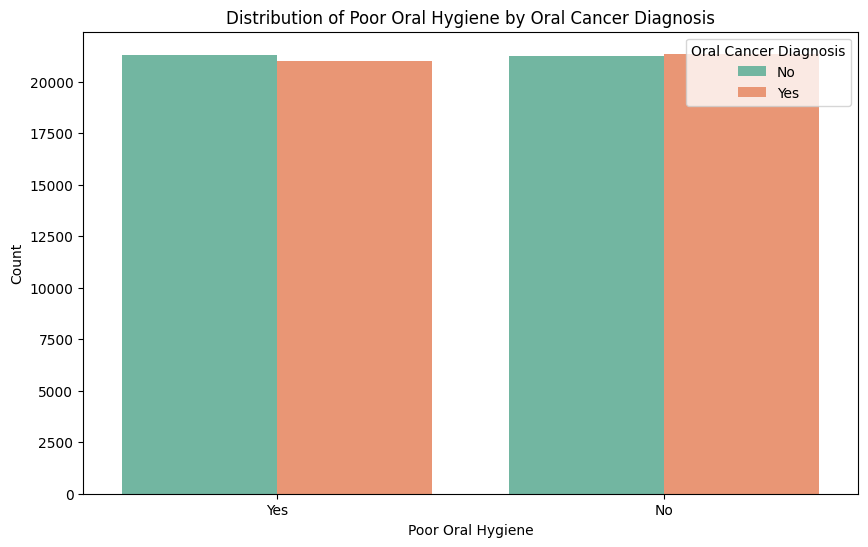

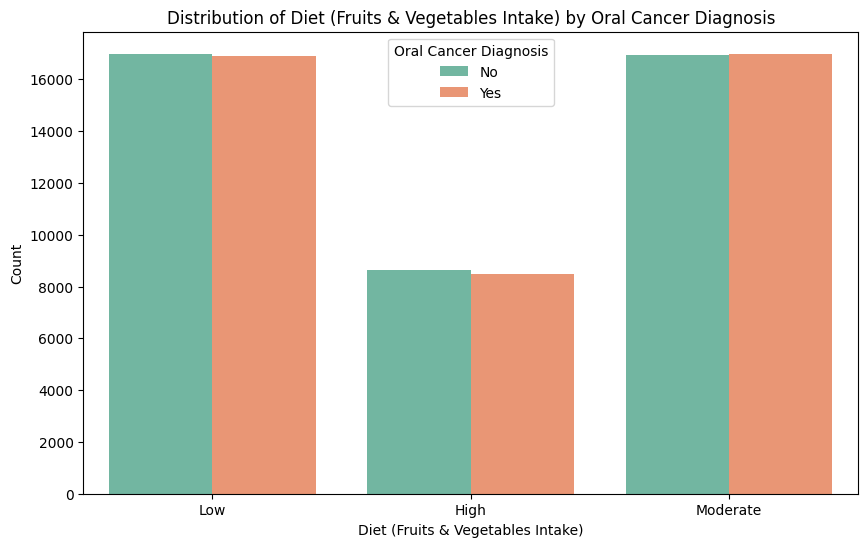

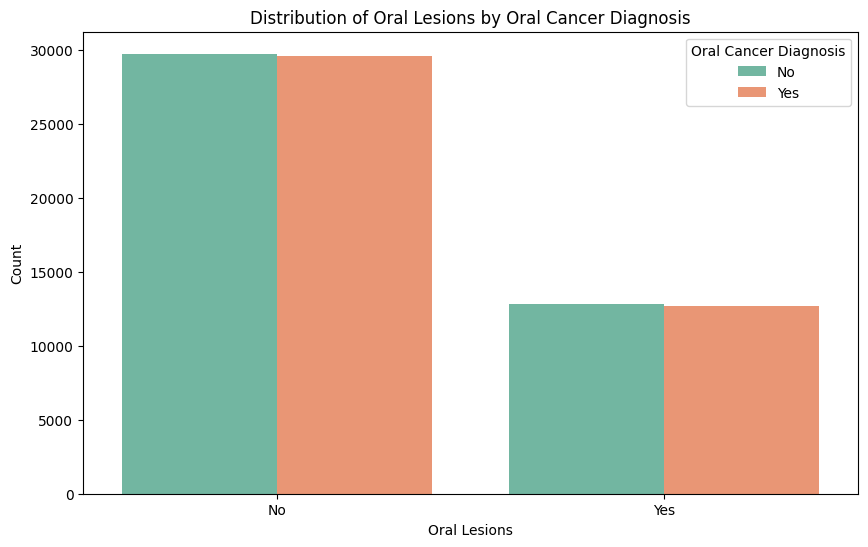

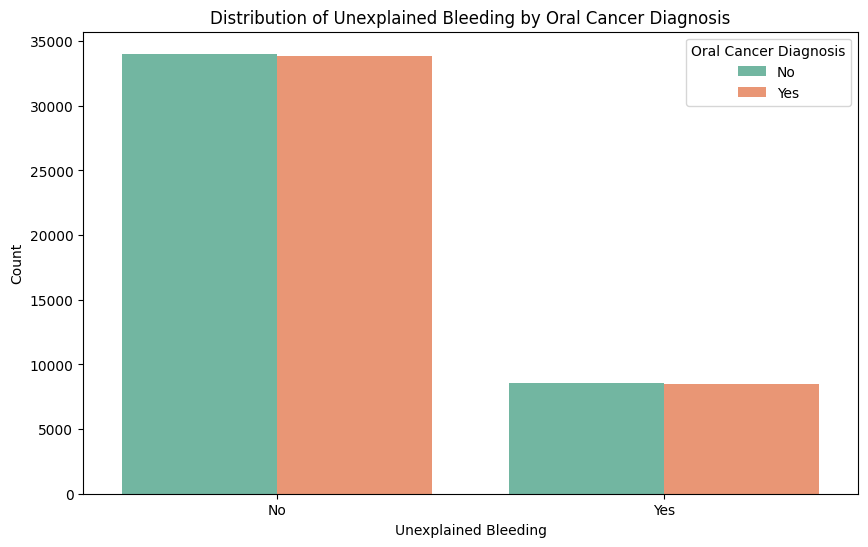

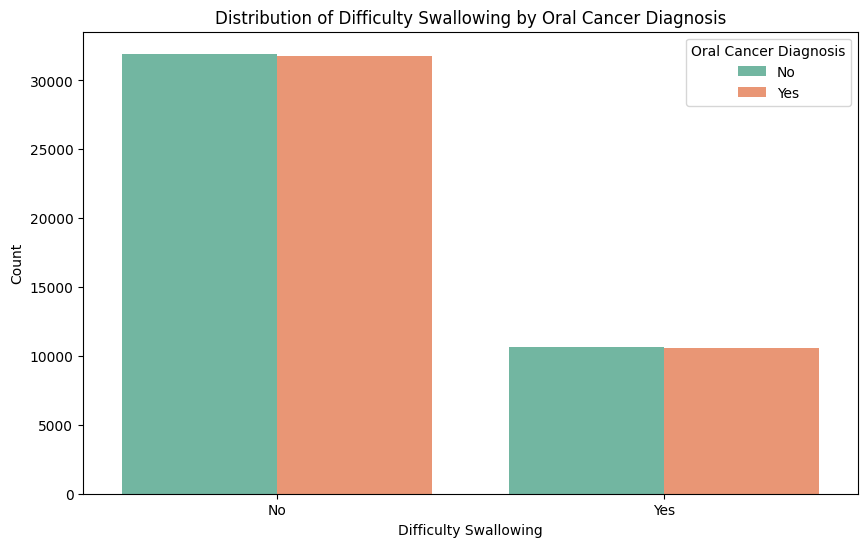

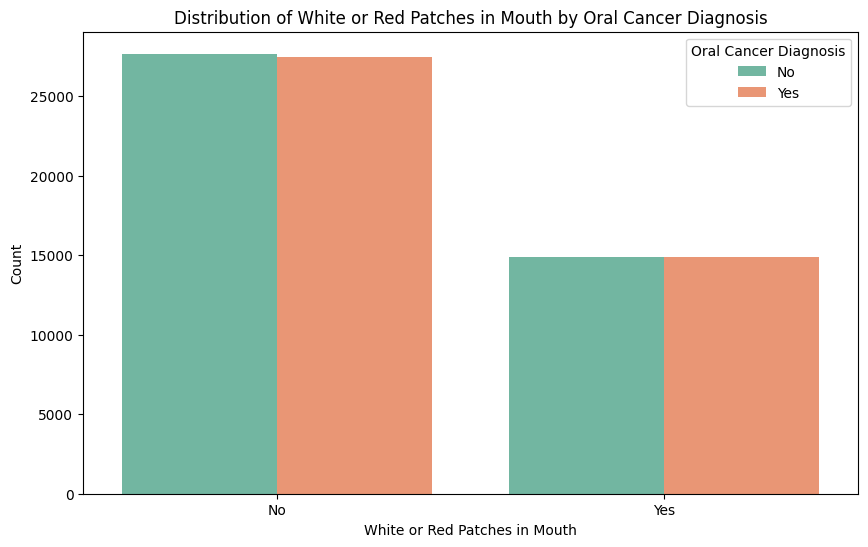

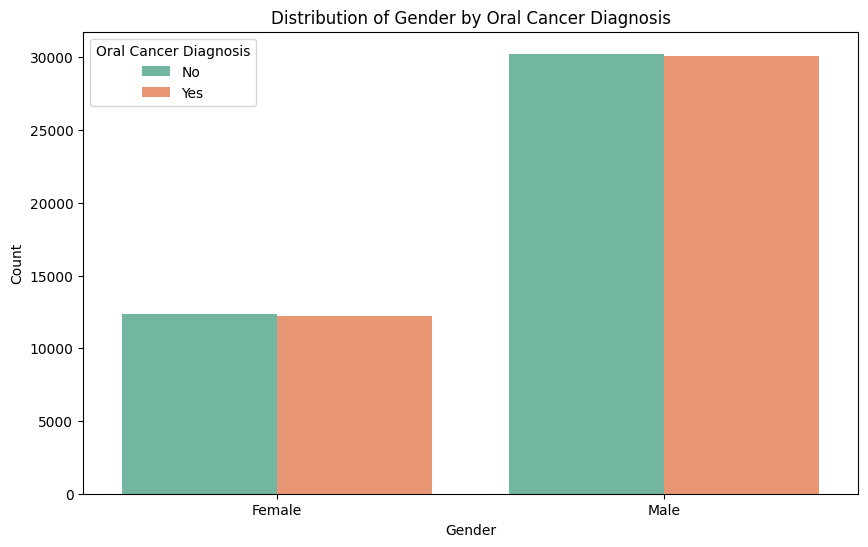

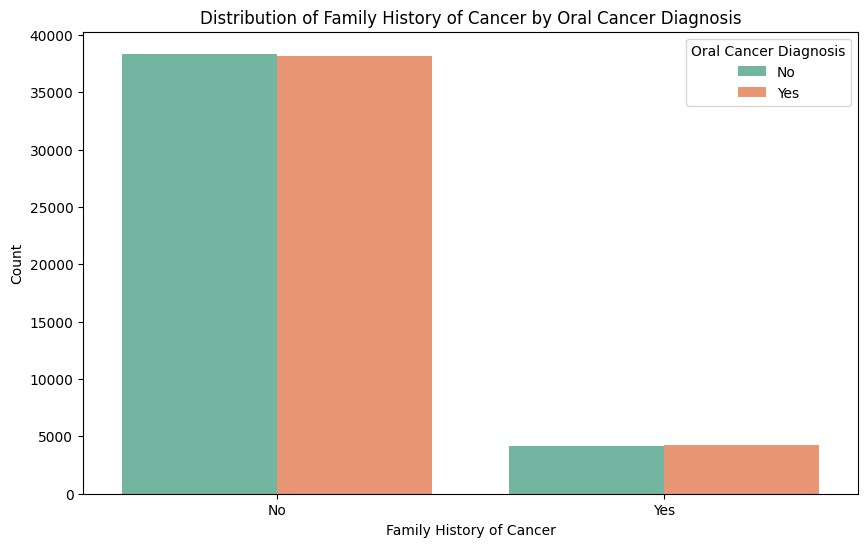

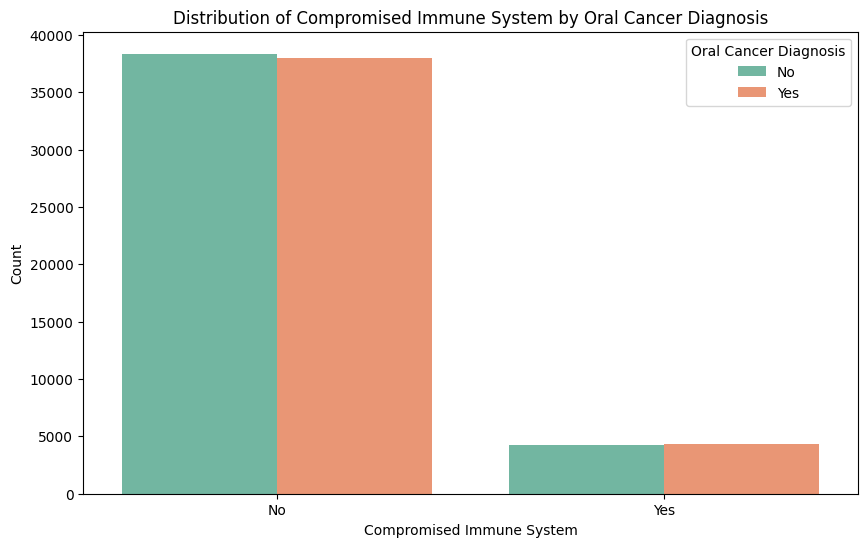

In [25]:
# Display categorical variables
for attribute in candidate_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_data, x=attribute, hue='Oral Cancer (Diagnosis)', palette='Set2')
    plt.title(f'Distribution of {attribute} by Oral Cancer Diagnosis')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.legend(title='Oral Cancer Diagnosis')
    plt.show()

**Age vs Oral Cancer**

In [26]:
# Separete the data into two groups based on Oral Cancer Diagnosis
group1 = merged_data[merged_data['Oral Cancer (Diagnosis)'] == 'Yes']
group2 = merged_data[merged_data['Oral Cancer (Diagnosis)'] == 'No']

# Perform T-test
t_stat, p_val = ttest_ind(group1['Age'], group2['Age'], equal_var=False)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Decide on rejection of null hypothesis
alpha = 0.05
if p_val < alpha:
    print("\nReject the null hypothesis: There is a significant difference in age between oral cancer and non-cancer groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in age between oral cancer and non-cancer groups.")

T-statistic: 0.673
P-value: 0.501

Fail to reject the null hypothesis: There is no significant difference in age between oral cancer and non-cancer groups.


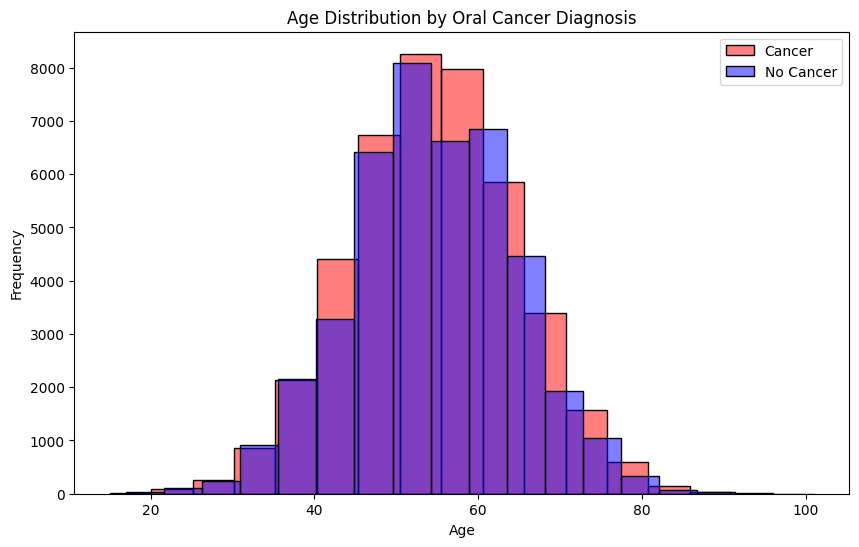

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=group1, x='Age', color='red', label='Cancer',  alpha=0.5, bins=17)
sns.histplot(data=group2, x='Age', color='blue', label='No Cancer', alpha=0.5, bins=17)
plt.title('Age Distribution by Oral Cancer Diagnosis')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Machine Learning

### Machine Learning For Survival Rate

In [28]:
# 1. Select only cancer diagnosed individuals
cancer_data = merged_data[merged_data['Oral Cancer (Diagnosis)'] == 'Yes'].copy()

# 2. Select relevant features
features = ['Health Expenditure', 'Age', 'Gender', 'Tumor Size (cm)', 'Cancer Stage', 'Treatment Type']
target = 'Survival Rate (5-Year, %)'

X = cancer_data[features]
y = cancer_data[target]

# 3. Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 4. Train-Test split (80%-20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Split training into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 6. Scale features (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 7. Train a regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 8. Predict and evaluate
def evaluate(model, X, y, dataset_name):
    preds = model.predict(X)
    print(f"--- {dataset_name} Evaluation ---")
    print("R² Score: ", r2_score(y, preds))
    print("MAE: ", mean_absolute_error(y, preds))
    mse = mean_squared_error(y, preds)
    print("RMSE: ", np.sqrt(mse))
    print()

evaluate(model, X_train_scaled, y_train, "Train")
evaluate(model, X_val_scaled, y_val, "Validation")
evaluate(model, X_test_scaled, y_test, "Test")

--- Train Evaluation ---
R² Score:  0.994069457233379
MAE:  1.4808910787919645
RMSE:  1.8175903075580426

--- Validation Evaluation ---
R² Score:  0.9590423099512448
MAE:  3.9833114983001554
RMSE:  4.837277960869093

--- Test Evaluation ---
R² Score:  0.957393358247016
MAE:  4.0061089492296
RMSE:  4.8760741652794755



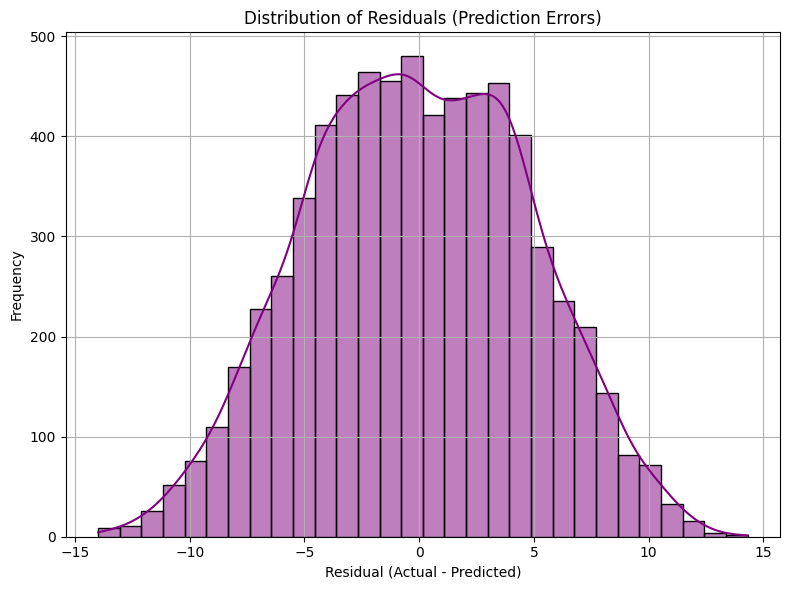

In [29]:
y_pred = model.predict(X_val_scaled)
residuals = y_val - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

### Machine Learning For Oral Cancer Diagnoses

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      8515
           1       0.50      0.49      0.50      8470

    accuracy                           0.50     16985
   macro avg       0.50      0.50      0.50     16985
weighted avg       0.50      0.50      0.50     16985

Confusion Matrix:
[[4325 4190]
 [4303 4167]]


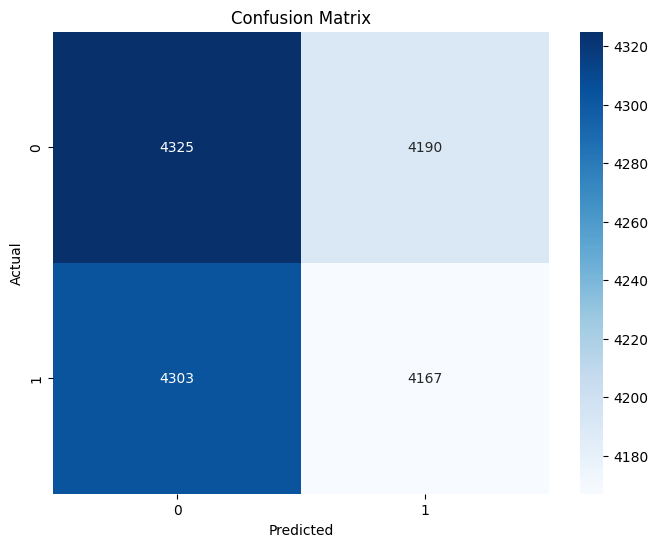

In [30]:
# Features
X = merged_data[[
    'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption', 'HPV Infection',
    'Betel Quid Use', 'Chronic Sun Exposure', 'Poor Oral Hygiene',
    'Diet (Fruits & Vegetables Intake)', 'Family History of Cancer',
    'Compromised Immune System', 'Oral Lesions', 'Unexplained Bleeding',
    'Difficulty Swallowing', 'White or Red Patches in Mouth'
]]

# Target variable
y = merged_data['Oral Cancer (Diagnosis)'].map({'Yes': 1, 'No': 0})

# Categorical features and numerical features
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(X[categorical_cols])

# Create a DataFrame for the encoded categorical features
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical features
X_final = pd.concat([X[numerical_cols].reset_index(drop=True), encoded_cat_df.reset_index(drop=True)], axis=1)

# Scale numerical features
scaler = StandardScaler()
X_final[numerical_cols] = scaler.fit_transform(X_final[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
